<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Insect_Detection_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 251, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 251 (delta 90), reused 138 (delta 90), pack-reused 113
Receiving objects: 100% (251/251), 74.44 MiB | 21.85 MiB/s, done.
Resolving deltas: 100% (160/160), done.


In [4]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00


In [1]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [2]:
import os
path = os.listdir('/content/drive/MyDrive/Insect/Training')
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}

**Preprocess**

In [3]:
import cv2

img_no = 1
x = []
y = []
z = []
histo = []

for cls in classes:
    input_path = '/content/drive/MyDrive/Insect/Training/' + cls
    output_path = '/content/drive/MyDrive/Insect/Preprocessed/' + cls

    # Create output directory if it doesn't exist
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j in os.listdir(input_path):
        realimage = cv2.imread(os.path.join(input_path, j), 1)

        # Preprocessing steps
        resizedImage = cv2.resize(realimage, (400, 400))

        color_contrastImage = img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))

        smooth_image = img_as_ubyte(cv2.GaussianBlur(color_contrastImage, (5, 5), 0, borderType=cv2.BORDER_CONSTANT))

        R, G, B = cv2.split(smooth_image)
        op_R = cv2.equalizeHist(R)
        op_G = cv2.equalizeHist(G)
        op_B = cv2.equalizeHist(B)
        histogram_image = cv2.merge((op_R, op_G, op_B))

        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        op2_R = clahe.apply(R)
        op2_G = clahe.apply(G)
        op2_B = clahe.apply(B)
        clahe_image = cv2.merge((op2_R, op2_G, op2_B))

        x.append(clahe_image)
        y.append(classes[cls])
        z.append(realimage)
        histo.append(histogram_image)

        img_no += 1

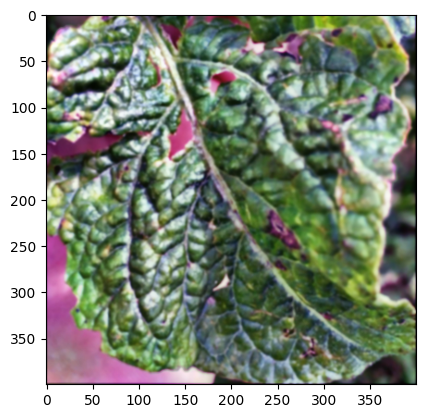

In [4]:
plt.imshow(x[150])

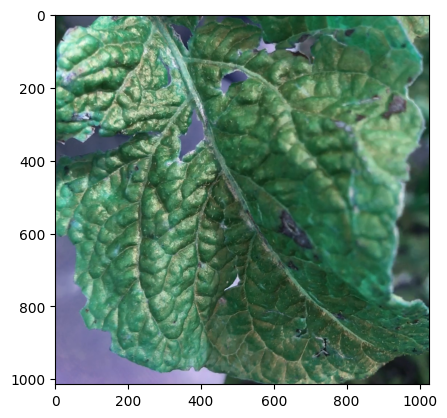

In [5]:
plt.imshow(z[150])

**Number of Images**

In [6]:
classes = {'Insect_Coloradopotatobeetle':0, 'Insect_Fleabeetle':1}
class_counts = {}

for cls in classes:
    pth = '/content/drive/MyDrive/Insect/bgremoveImagesNew/' + cls
    file_count = len([f for f in os.listdir(pth) if os.path.isfile(os.path.join(pth, f))])
    class_counts[cls] = file_count

# Print the number of images for each class
for cls, count in class_counts.items():
    print(f"Number of images for class {cls}: {count}")

Number of images for class Insect_Coloradopotatobeetle: 400
Number of images for class Insect_Fleabeetle: 409


**Background Remove**

In [ ]:
classes = ['Insect_Coloradopotatobeetle', 'Insect_Fleabeetle']
output_base_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew/'

img_no = 1  # Counter for saving the processed images

for cls in classes:
    input_path = f'/content/drive/MyDrive/Insect/preprocessing_augmentation/{cls}'

    # Create the output directory for the class if it doesn't exist
    output_path = os.path.join(output_base_path, cls)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for j, file in enumerate(os.listdir(input_path)):
        image_path = os.path.join(input_path, file)
        realimage = cv2.imread(image_path, 1)
        img1 = cv2.resize(realimage, (400, 400))
#The image data type is converted to uint8 using img_as_ubyte() function from skimage library.
        new_img = img_as_ubyte(img1)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        x.append(bg_rem_img)

        output_file = os.path.join(output_path, f'{img_no}.jpg')
        #cv2.imwrite(output_file, bg_rem_img_BGR)

        img_no += 1

print("Removing bg and saving complete!")

**Show BgRemove Image**

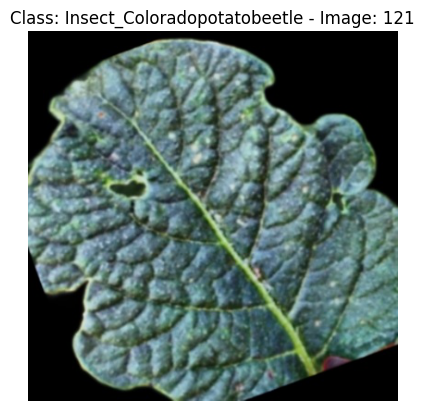

In [7]:
import matplotlib.pyplot as plt

# Path to the directory containing the processed images
processed_images_path = '/content/drive/MyDrive/Insect/bgremoveImagesNew'

# Function to display a specific image
def show_image(cls, img_num):
    class_output_path = os.path.join(processed_images_path, cls)
    image_path = os.path.join(class_output_path, f'{img_num}.jpg')
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.title(f'Class: {cls} - Image: {img_num}')
    plt.axis('off')
    plt.show()

# Choose the image to display 121, 122, 201,123,12,15,1,52
cls = 'Insect_Coloradopotatobeetle'
img_num = 121

# Display the chosen image
show_image(cls, img_num)


In [8]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from skimage.feature import greycomatrix, greycoprops
from sklearn.model_selection import train_test_split

**Segmentation**

**Step 1 - Segmentation with applying Mask**

In [9]:
# Function to convert image to grayscale
def convert_to_grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:
        gray = convert_to_grayscale(img)

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        texture_features = np.array([contrast, energy, homogeneity, correlation])
        features.append(texture_features)

    return np.array(features)

path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)

        # Create a green mask with the same size as the image
        mask = np.full_like(img, (0, 255, 0), dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(img, mask)

        # Convert result to grayscale
        gray = convert_to_grayscale(result)

        # Apply thresholding to segment the insect harm region
        _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

        # Resize the mask to match the size of the original image
        mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))

        # Create a binary mask from the resized mask
        mask_binary = cv2.bitwise_not(mask_resized)

        # Apply the binary mask to the original image
        insect_harm_region = cv2.bitwise_and(img, mask_binary)

        x.append(insect_harm_region)
        y.append(classes[cls])

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
x_updated = np.concatenate((x_updated, x_texture_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

import xgboost as xgb

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Training Score: 0.975
Test Score: 0.9375


**Step 2 - Segmentation with Thresh**

In [14]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        texture_features = np.array([contrast, energy, homogeneity, correlation])
        features.append(texture_features)

    return np.array(features)

path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)

        # Thresholding segmentation method
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        x.append(thresh)
        y.append(classes[cls])

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
x_updated = np.concatenate((x_updated, x_texture_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=70, test_size=0.2)

import xgboost as xgb

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Training Score: 0.946875
Test Score: 0.875


**Step 3 - Segmentation with Thresh & Mask applying**

In [15]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        texture_features = np.array([contrast, energy, homogeneity, correlation])
        features.append(texture_features)

    return np.array(features)

path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)

        # Thresholding segmentation method
        image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)

        x.append(thresh)
        y.append(classes[cls])

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
x_updated = np.concatenate((x_updated, x_texture_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=75, test_size=0.2)

import xgboost as xgb

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Training Score: 0.95
Test Score: 0.9125


**Step 4 - Segmentation with Thresh, Mask & Contour based applying**

In [16]:

path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)

        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        image = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)

        # Find contours in the image
        contours, _ = cv2.findContours(result, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Calculate contour-based features
        areas = []
        perimeters = []
        for contour in contours:
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, True)
            areas.append(area)
            perimeters.append(perimeter)

        # Create feature vector
        features = [max(areas), min(areas), np.mean(areas), max(perimeters), min(perimeters), np.mean(perimeters)]

        x.append(features)
        y.append(classes[cls])

x = np.array(x)
y = np.array(y)

# Feature Scaling
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=65, test_size=0.2)

# Create and train the SVM classifier
svm = SVC()
svm.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", svm.score(x_train, y_train))
print("Test Score:", svm.score(x_test, y_test))

Training Score: 0.6
Test Score: 0.5125


**Final step - Segmentation with Canny, Thresh & Mask**

In [9]:
path = '/content/drive/MyDrive/Insect/bgRemove/'
classes = {'Colorado': 0, 'flea': 1}

x = []
y = []

for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        img = cv2.imread(os.path.join(pth, j), 1)

        edges = cv2.Canny(image=img, threshold1=10, threshold2=20)
        edgedetect_image = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

        # Thresholding segmentation method
        image = cv2.cvtColor(edgedetect_image, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

        # Create a green mask with the same size as the image
        mask = np.full_like(thresh, 255, dtype=np.uint8)

        # Apply the mask to the image
        result = cv2.bitwise_and(thresh, mask)

        x.append(result)
        y.append(classes[cls])

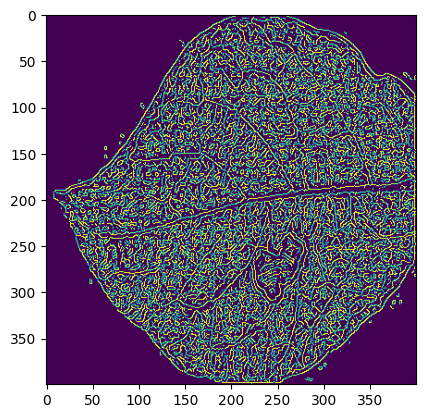

In [10]:
plt.imshow(x[180])

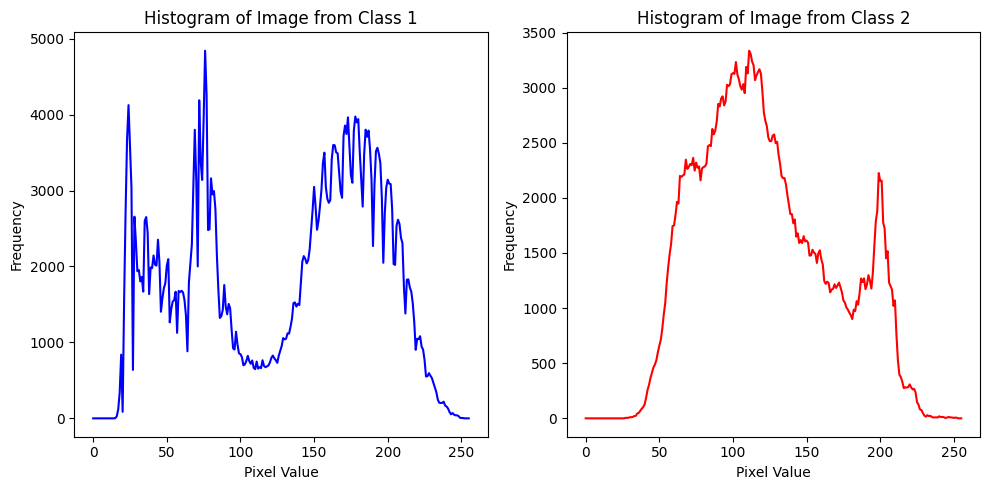

In [11]:
import matplotlib.pyplot as plt

# Choose one image from each class for comparison (0,5  1,5  10,52 15,23)
class1_idx = 15
class2_idx = 23

# Convert the chosen images to grayscale
gray_img1 = cv2.cvtColor(z[class1_idx], cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(z[class2_idx], cv2.COLOR_BGR2GRAY)

# Compute histograms for the grayscale images
hist1 = cv2.calcHist([gray_img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([gray_img2], [0], None, [256], [0, 256])

# Plot histogram for image from class 1
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist1, color='b')
plt.title(f"Histogram of Image from Class 1")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Plot histogram for image from class 2
plt.subplot(1, 2, 2)
plt.plot(hist2, color='r')
plt.title(f"Histogram of Image from Class 2")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

**Feature Extraction & Classification**

In [63]:
import numpy as np
import cv2
import os
from skimage.feature import greycomatrix, greycoprops
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Function to extract texture features
def extract_texture_features(images):
    features = []
    for img in images:
        if img.ndim == 2:
            # Grayscale image
            gray = img
        elif img.ndim == 3:
            # Color image, convert to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            raise ValueError("Invalid image shape. Expected 2 or 3 dimensions.")

        # Calculate Haralick texture features
        glcm = greycomatrix(gray, distances=[1], angles=[0, np.pi / 4, np.pi / 2, 3 * np.pi / 4], levels=256, symmetric=True, normed=True)
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        energy = greycoprops(glcm, 'energy')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
        correlation = greycoprops(glcm, 'correlation')[0, 0]

        texture_features = np.array([contrast, energy, homogeneity, correlation])
        features.append(texture_features)

    return np.array(features)

# Print texture feature names
print("Texture Features:")
texture_feature_names = ['Contrast', 'Energy', 'Homogeneity', 'Correlation']

x = np.array(x)
y = np.array(y)

# Extract texture features
x_texture_features = extract_texture_features(x)

# Prepare data
x_updated = x.reshape(len(x), -1)
x_updated = np.concatenate((x_updated, x_texture_features, x_shape_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Texture Features:


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Training Score: 0.975
Test Score: 0.95


In [64]:
# Print texture feature names
print("Texture Features:")
for feature_name in texture_feature_names:
    print(feature_name)

Texture Features:
Contrast
Energy
Homogeneity
Correlation


In [65]:
import xgboost as xgb

In [66]:
# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Training Score: 0.975
Test Score: 0.95


In [59]:
# Print texture features
print("Texture Features:")
for i, feature_name in enumerate(texture_feature_names):
    print(f"{feature_name}: {x_texture_features[0][i]}")


Texture Features:
Contrast: 18799.39567669173
Energy: 0.6447624825929535
Homogeneity: 0.7108941703827434
Correlation: 0.23668426247366078


In [67]:
x = np.array(x)
y = np.array(y)

# Prepare data
x_updated = x.reshape(len(x), -1)
# x_updated = np.concatenate((x_updated, x_texture_features, x_shape_features), axis=1)
x_updated.shape

# Feature Scaling
x_updated = x_updated / 255

# Standardize the dataset
sc = StandardScaler()
sc.fit(x_updated)
x_std = sc.transform(x_updated)

# Feature extraction and dimensionality reduction using PCA
pca = PCA(n_components=0.98)
x_pca = pca.fit_transform(x_std)

# Split dataset into train and test subsets
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=65, test_size=0.2)

# Create and train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

# Evaluate the model
print("Training Score:", xgb_classifier.score(x_train, y_train))
print("Test Score:", xgb_classifier.score(x_test, y_test))

Training Score: 0.975
Test Score: 0.9625


**TriedOut - Not suitable**

In [68]:
# Create and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

print("SVM - Training Score:", svm_classifier.score(x_train, y_train))
print("SVM - Test Score:", svm_classifier.score(x_test, y_test))

SVM - Training Score: 0.925
SVM - Test Score: 0.9375


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train, y_train)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

print("SVM - Training Score:", svm_classifier.score(x_train, y_train))
print("SVM - Test Score:", svm_classifier.score(x_test, y_test))

print("KNN - Training Score:", knn_classifier.score(x_train, y_train))
print("KNN - Test Score:", knn_classifier.score(x_test, y_test))

print("Decision Tree - Training Score:", dt_classifier.score(x_train, y_train))
print("Decision Tree - Test Score:", dt_classifier.score(x_test, y_test))

SVM - Training Score: 0.925
SVM - Test Score: 0.9375
KNN - Training Score: 0.896875
KNN - Test Score: 0.85
Decision Tree - Training Score: 0.975
Decision Tree - Test Score: 0.9125


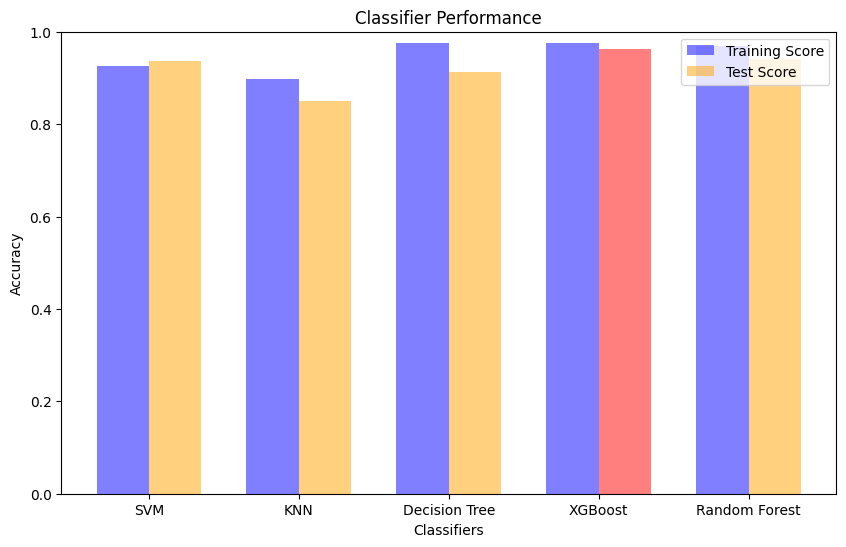

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

# Compute the scores
svm_train_score = svm_classifier.score(x_train, y_train)
svm_test_score = svm_classifier.score(x_test, y_test)

knn_train_score = knn_classifier.score(x_train, y_train)
knn_test_score = knn_classifier.score(x_test, y_test)

dt_train_score = dt_classifier.score(x_train, y_train)
dt_test_score = dt_classifier.score(x_test, y_test)

xgb_train_score = xgb_classifier.score(x_train, y_train)
xgb_test_score = xgb_classifier.score(x_test, y_test)

# Manually add training and testing scores for Random Forest
rf_train_score = 0.97
rf_test_score = 0.94

# Create a list of classifier labels
classifiers = ['SVM', 'KNN', 'Decision Tree', 'XGBoost', 'Random Forest']

# Create lists of training and test scores
training_scores = [svm_train_score, knn_train_score, dt_train_score, xgb_train_score, rf_train_score]
test_scores = [svm_test_score, knn_test_score, dt_test_score, xgb_test_score, rf_test_score]

# Set the position of the bars on the x-axis
bar_width = 0.35
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]

# Plot the histogram
plt.figure(figsize=(10, 6))

# Highlight the highest testing score with red color
max_test_score = max(test_scores)
test_colors = ['orange' if score < max_test_score else 'red' for score in test_scores]

plt.bar(r1, training_scores, color='blue', width=bar_width, alpha=0.5, label='Training Score')
plt.bar(r2, test_scores, color=test_colors, width=bar_width, alpha=0.5, label='Test Score')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks([r + bar_width/2 for r in range(len(classifiers))], classifiers)
plt.ylim([0, 1])
plt.legend()
plt.show()


**Prediction**

In [71]:
pred = xgb_classifier.predict(x_test)
incorrect_indices = np.where(y_test != pred)

print("Incorrect predictions indices:", incorrect_indices)

Incorrect predictions indices: (array([26, 47, 53]),)


In [72]:
pred[8]

0

In [73]:
y_test[8]

0

**Evaluation**

In [74]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
y_train_pred = xgb_classifier.predict(x_train)
y_test_pred = xgb_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Training Precision:", train_precision)
print("Testing Precision:", test_precision)

print("Training Recall:", train_recall)
print("Testing Recall:", test_recall)

print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

# Classification report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.975
Testing Accuracy: 0.9625
Training Precision: 0.9757149554617909
Testing Precision: 0.9628361475922451
Training Recall: 0.975
Testing Recall: 0.9625
Training F1 Score: 0.9750146627565982
Testing F1 Score: 0.9625176028790488

Classification Report (Testing):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.98      0.95      0.96        42

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



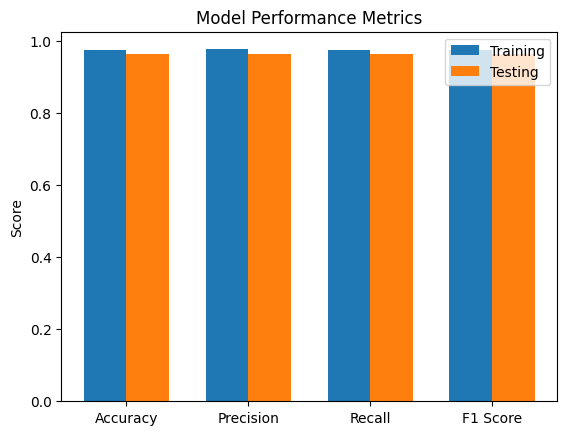

In [75]:
import matplotlib.pyplot as plt

# Performance metrics for training and testing sets
training_metrics = {
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_recall,
    'F1 Score': train_f1
}

testing_metrics = {
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1 Score': test_f1
}

# Plot the performance metrics
fig, ax = plt.subplots()
x_train = np.arange(len(training_metrics))
x_test = np.arange(len(testing_metrics))
width = 0.35

# Plot training metrics
ax.bar(x_train, list(training_metrics.values()), width, label='Training')

# Plot testing metrics
ax.bar(x_test + width, list(testing_metrics.values()), width, label='Testing')

ax.set_xticks(x_train + width/2)
ax.set_xticklabels(training_metrics.keys())
ax.set_ylabel('Score')
ax.set_title('Model Performance Metrics')
ax.legend()
plt.show()


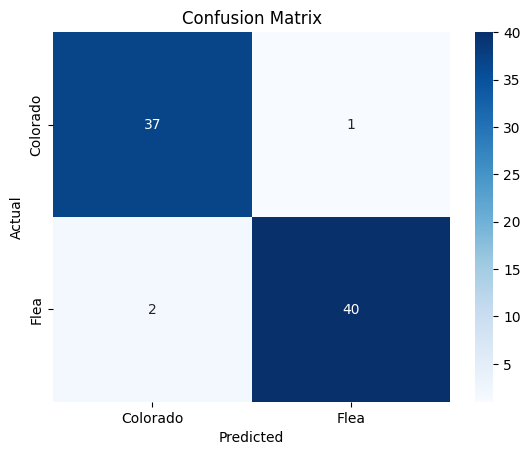

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate and visualize the confusion matrix on the testing data
cm = confusion_matrix(y_test, y_test_pred)
class_names = ['Colorado', 'Flea']

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**XGBoot Model trained**

In [20]:
import joblib

# Save the trained model
joblib.dump(xgb_classifier, '/content/drive/MyDrive/Insect/Insect Detection Model/xgb_classifier.pkl')

['/content/drive/MyDrive/Insect/Insect Detection Model/xgb_classifier.pkl']

**Testing**

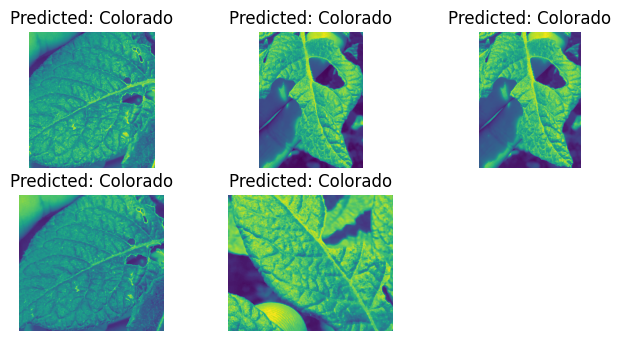

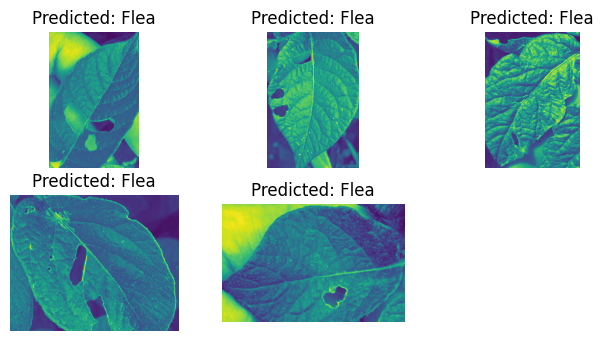

In [77]:
import joblib
import os
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Insect/Insect Detection Model/xgb_classifier.pkl')

# Define the class names
class_names = ['Flea','Colorado']

# Create an empty figure
plt.figure(figsize=(8, 6))
c = 1

# Iterate over the test images
for i, image_name in enumerate(os.listdir('/content/drive/MyDrive/Insect/Testing/Colorado/')[:5]):
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Colorado/' + image_name, 0)
    img_resized = cv2.resize(img, (157, 1))
    img_flattened = img_resized.reshape(1, -1) / 255

    # Check if the image shape matches the expected shape (157)
    if img_flattened.shape[1] != 157:
        continue

    # Make a prediction on the image
    pred = model.predict(img_flattened)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes

    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    c += 1

plt.show()

# Create an empty figure
plt.figure(figsize=(8, 6))
c = 1

# Iterate over the test images
for i, image_name in enumerate(os.listdir('/content/drive/MyDrive/Insect/Testing/Flea/')[:5]):
    plt.subplot(3, 3, c)

    img = cv2.imread('/content/drive/MyDrive/Insect/Testing/Flea/' + image_name, 0)
    img_resized = cv2.resize(img, (157, 1))
    img_flattened = img_resized.reshape(1, -1) / 255

    # Check if the image shape matches the expected shape (157)
    if img_flattened.shape[1] != 157:
        continue

    # Define the class names
    class_names = ['Colorado','Flea']

    # Make a prediction on the image
    pred = model.predict(img_flattened)
    pred_class_name = class_names[pred[0]]  # Use the same indexing for both classes

    plt.imshow(img)
    plt.axis('off')
    plt.title('Predicted: {}'.format(pred_class_name))
    c += 1

plt.show()
